# Plot Statics

In [1]:
import numpy as np
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
import pandas as pd

In [2]:
data0 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_0_prma100.csv.csv'))
dataszA = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//sz_analytical.csv'))
datapi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi16_prma100.csv'))
datapi8 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi8_prma100.csv'))
data3pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_3pi16_prma100.csv'))
datapi4 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi4_prma100.csv'))
data5pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_5pi16_prma100.csv'))
data3pi8 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_3pi8_prma100.csv'))
data7pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_7pi16_prma100.csv'))
datapi2 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi2_prma100.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/crh222/Data/Statics/mfgs1D_0_prma100.csv.csv'

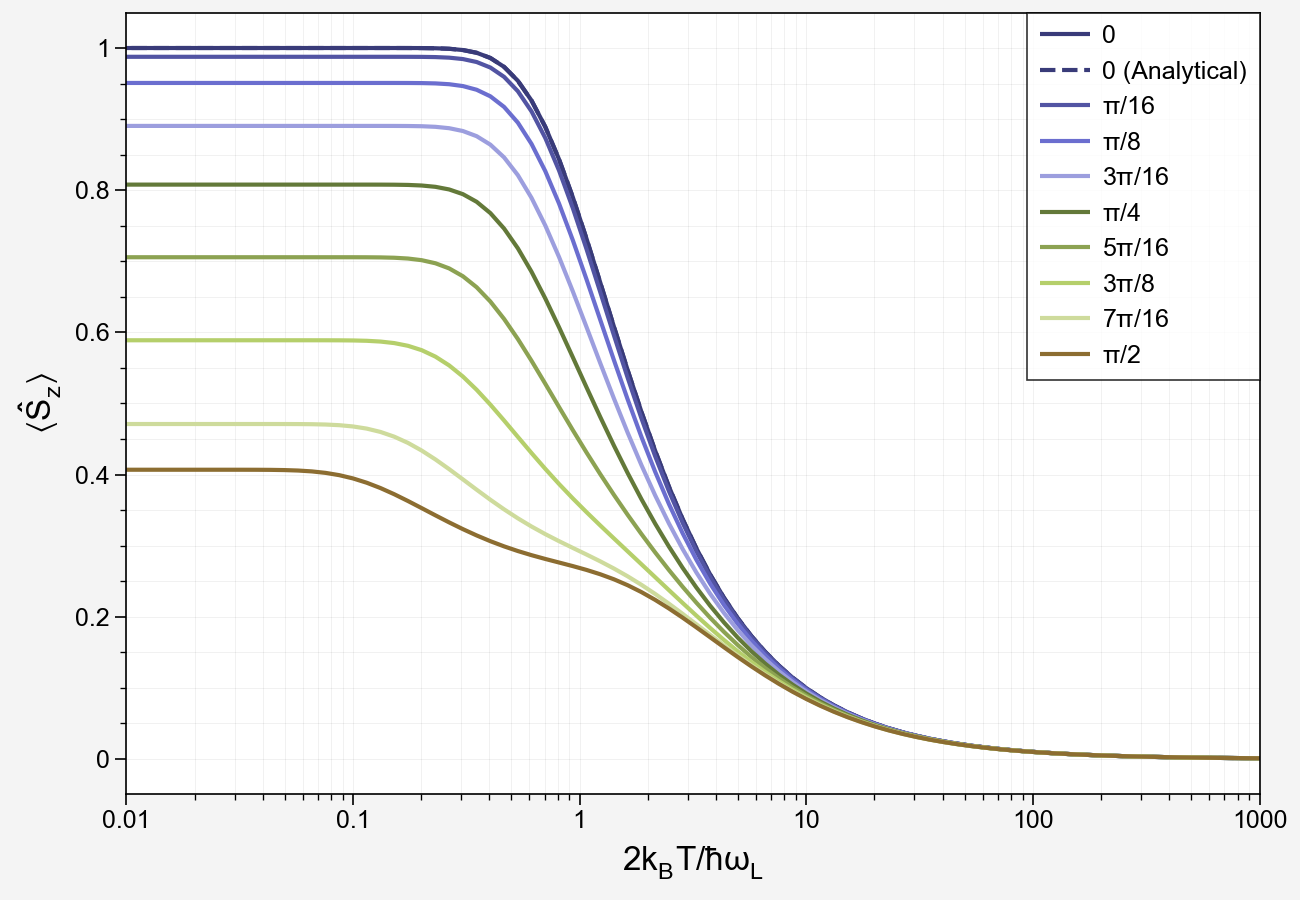

In [57]:
fig, ax = pplt.subplots(figsize=(6.5, 4.5))  #size in inches

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel("$2 k_B T/\hbar \omega_L$", fontsize=12)
ax.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax.set_xlim(0.01, 1000)
pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax.semilogx(data0[:,0], -data0[:,5], 'C0-', label = "0")
ax.semilogx(dataszA[:,0], -dataszA[:,1], 'C0--', label = "0 (Analytical)") # 1D Analytic Expression for Purely z-Coupling
ax.semilogx(datapi16[:,0], -datapi16[:,5], 'C1-', label = "$\pi/16$")
ax.semilogx(datapi8[:,0], -datapi8[:,5], 'C2-', label = "$\pi/8$")
ax.semilogx(data3pi16[:,0], -data3pi16[:,5], 'C3-', label = "$3\pi/16$")
ax.semilogx(datapi4[:,0], -datapi4[:,5], 'C4-', label = "$\pi/4$")
ax.semilogx(data5pi16[:,0], -data5pi16[:,5], 'C5-', label = "$5\pi/16$")
ax.semilogx(data3pi8[:,0], -data3pi8[:,5], 'C6-', label = "$3\pi/8$")
ax.semilogx(data7pi16[:,0], -data7pi16[:,5], 'C7-', label = "$7\pi/16$")
ax.semilogx(datapi2[:,0], -datapi2[:,5], 'C8-', label = "$\pi/2$")

##### Plot ######

plt.legend(ncol=1)
plt.grid(which='both', lw='0.2')
# plt.title('Steady-State Magnetisations at Angle $\\theta$ from z-Axis (Prm. A)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//MFGS1D_theta.pdf", dpi=300)

## Geometric Plots ##

In [2]:
dataG = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//Gibbs.csv')) 

In [3]:
data1D_x = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//MFGS_1D_x_prma_100.csv'))
data1D_z = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//MFGS_1D_z_prma_100.csv'))
data2D_xy = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//MFGS_2D_xy_prma_10.csv'))
data2D_xz = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//MFGS_2D_xz_prma_10.csv'))
data3D_xyz = np.array(pd.read_csv(r'C://Users//crh222//Data//Quantum//Statics//MFGS_3D_xyz_prma_5.csv'))

data1D_x_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//Classical//MFGS_1D_x_prma.csv'))
data1D_z_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//Classical//MFGS_1D_z_prma.csv'))
data2D_xy_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//Classical//MFGS_2D_xy_prma.csv'))
data2D_xz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//Classical//MFGS_2D_xz_prma.csv'))
data3D_xyz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//Classical//MFGS_3D_xyz_prma.csv'))

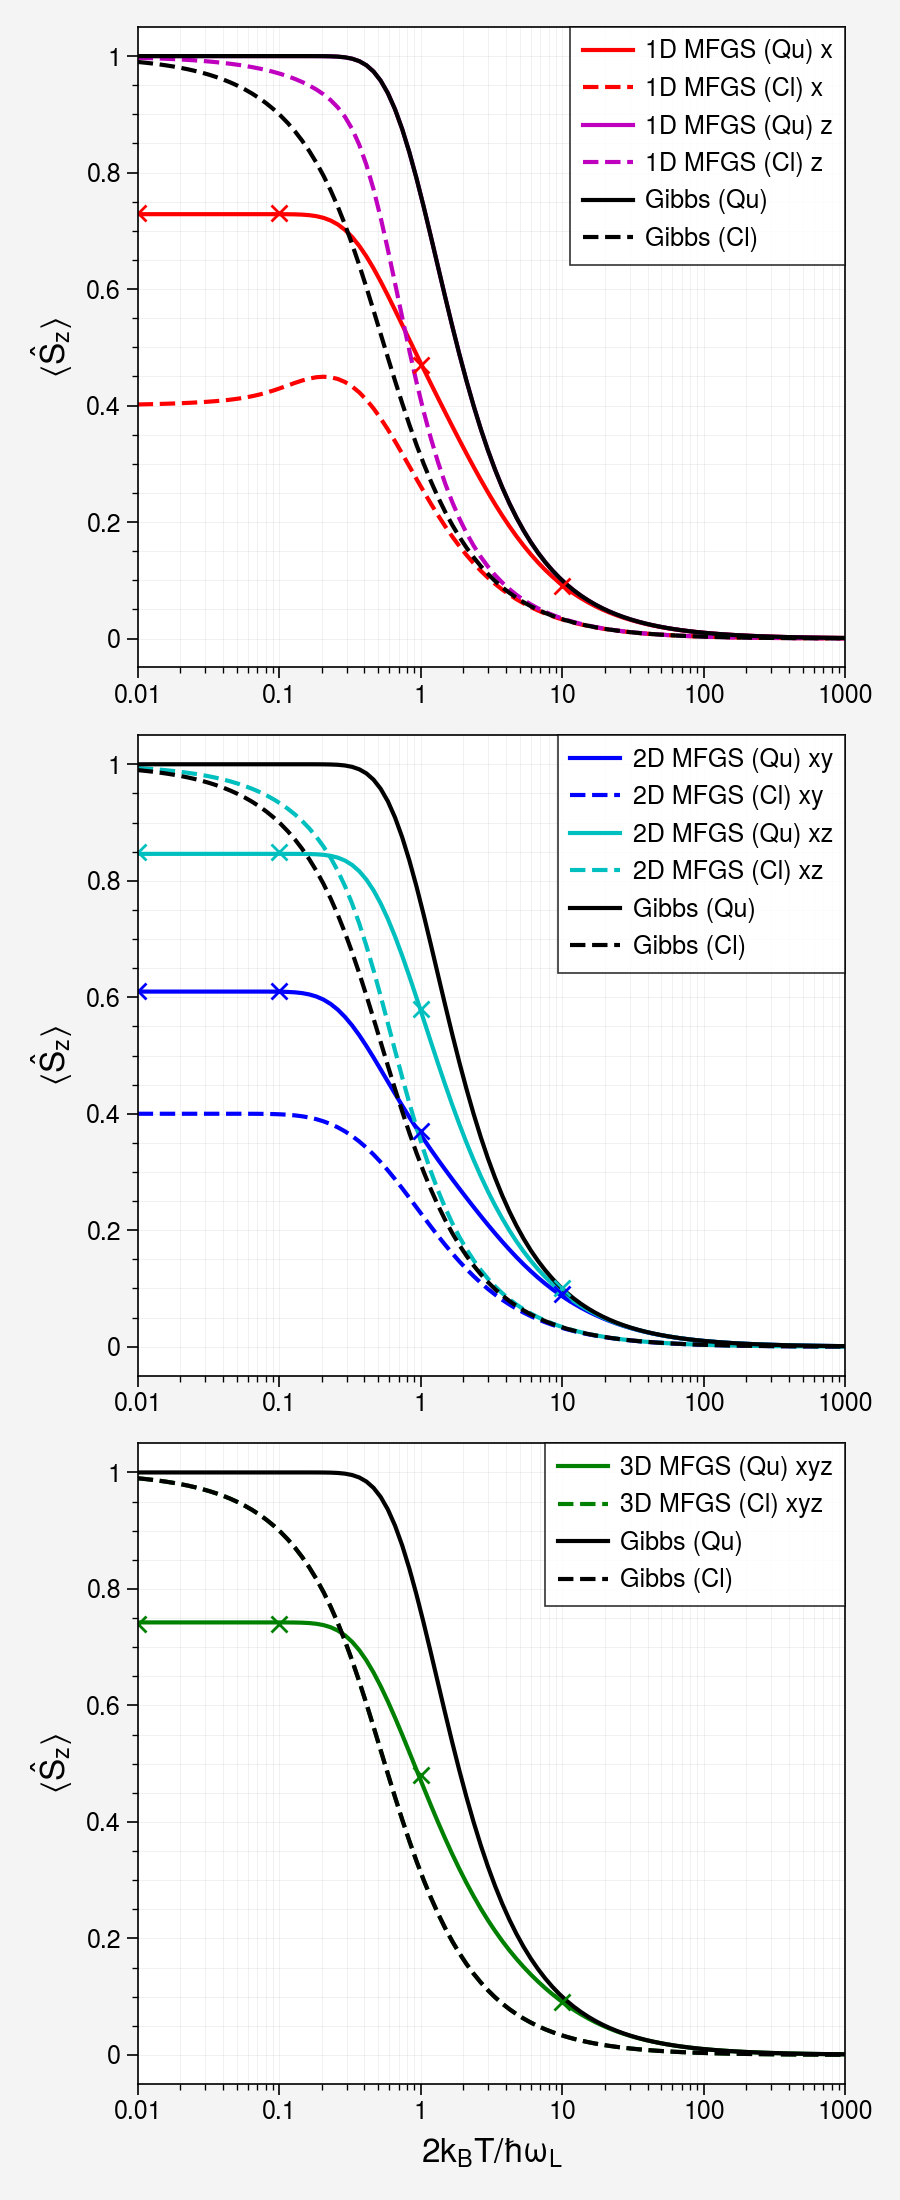

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(4.5, 11))  #size in inches

ax[0].get_xaxis().tick_bottom()
ax[0].get_yaxis().tick_left()
ax[1].get_xaxis().tick_bottom()
ax[1].get_yaxis().tick_left()
ax[2].get_xaxis().tick_bottom()
ax[2].get_yaxis().tick_left()

ax[2].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax[0].set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)
ax[1].set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)
ax[2].set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)


ax[0].set_xlim(0.01, 1000)
ax[1].set_xlim(0.01, 1000)
ax[2].set_xlim(0.01, 1000)

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax[0].semilogx(data1D_x[:,0], -data1D_x[:,1], 'r-', label="1D MFGS (Qu) x") # 1D MFGS X/Y
ax[0].semilogx(data1D_x_cl[:,0], data1D_x_cl[:,1], 'r--', label="1D MFGS (Cl) x") # 1D MFGS X/Y
ax[0].semilogx(data1D_z[:,0], -data1D_z[:,1], 'm-', label="1D MFGS (Qu) z") # 1D MFGS Z
ax[0].semilogx(data1D_z_cl[:,0], data1D_z_cl[:,1], 'm--', label="1D MFGS (Cl) z") # 1D MFGS Z
ax[0].semilogx(dataG[:,0], -dataG[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax[0].semilogx(dataG[:,0], ((1/np.tanh(1/dataG[:,0]) - (dataG[:,0]))), 'k--', label="Gibbs (Cl)")
ax[0].grid(which='both', lw='0.2')

ax[0].plot(0.01, 0.73, 'rx')
ax[0].plot(0.1, 0.73, 'rx')
ax[0].plot(1, 0.47, 'rx')
ax[0].plot(10, 0.09, 'rx')

ax[1].semilogx(data2D_xy[:,0], -data2D_xy[:,1], 'b-', label="2D MFGS (Qu) xy") # 2D MFGS XY
ax[1].semilogx(data2D_xy_cl[:,0], data2D_xy_cl[:,1], 'b--', label="2D MFGS (Cl) xy") # 2D MFGS XY
ax[1].semilogx(data2D_xz[:,0], -data2D_xz[:,1], 'c-',label="2D MFGS (Qu) xz") # 2D MFGS XZ
ax[1].semilogx(data2D_xz_cl[:,0], data2D_xz_cl[:,1], 'c--', label="2D MFGS (Cl) xz") # 2D MFGS XY
ax[1].semilogx(dataG[:,0], -dataG[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax[1].semilogx(dataG[:,0], ((1/np.tanh(1/dataG[:,0]) - (dataG[:,0]))), 'k--', label="Gibbs (Cl)")
ax[1].grid(which='both', lw='0.2')

ax[1].plot(0.01, 0.85, 'cx')
ax[1].plot(0.1, 0.85, 'cx')
ax[1].plot(1, 0.58, 'cx')
ax[1].plot(10, 0.1, 'cx')

ax[1].plot(0.01, 0.61, 'bx')
ax[1].plot(0.1, 0.61, 'bx')
ax[1].plot(1, 0.37, 'bx')
ax[1].plot(10, 0.09, 'bx')

ax[2].semilogx(data3D_xyz[:,0], -data3D_xyz[:,1], 'g-', label="3D MFGS (Qu) xyz") # 3D MFGS XYZ
ax[2].semilogx(data3D_xyz_cl[:,0], data3D_xyz_cl[:,1], 'g--', label="3D MFGS (Cl) xyz") # 3D MFGS XYZ
ax[2].semilogx(dataG[:,0], -dataG[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax[2].semilogx(dataG[:,0], ((1/np.tanh(1/dataG[:,0]) - (dataG[:,0]))), 'k--', label="Gibbs (Cl)") # Gibbs State
ax[2].grid(which='both', lw='0.2')

ax[2].plot(0.01, 0.74, 'gx')
ax[2].plot(0.1, 0.74, 'gx')
ax[2].plot(1, 0.48, 'gx')
ax[2].plot(10, 0.09, 'gx')


ax[0].legend(ncol=1)
ax[1].legend(ncol=1)
ax[2].legend(ncol=1)

fig.tight_layout()

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//dim_comp_prma_100155.pdf", dpi=300)

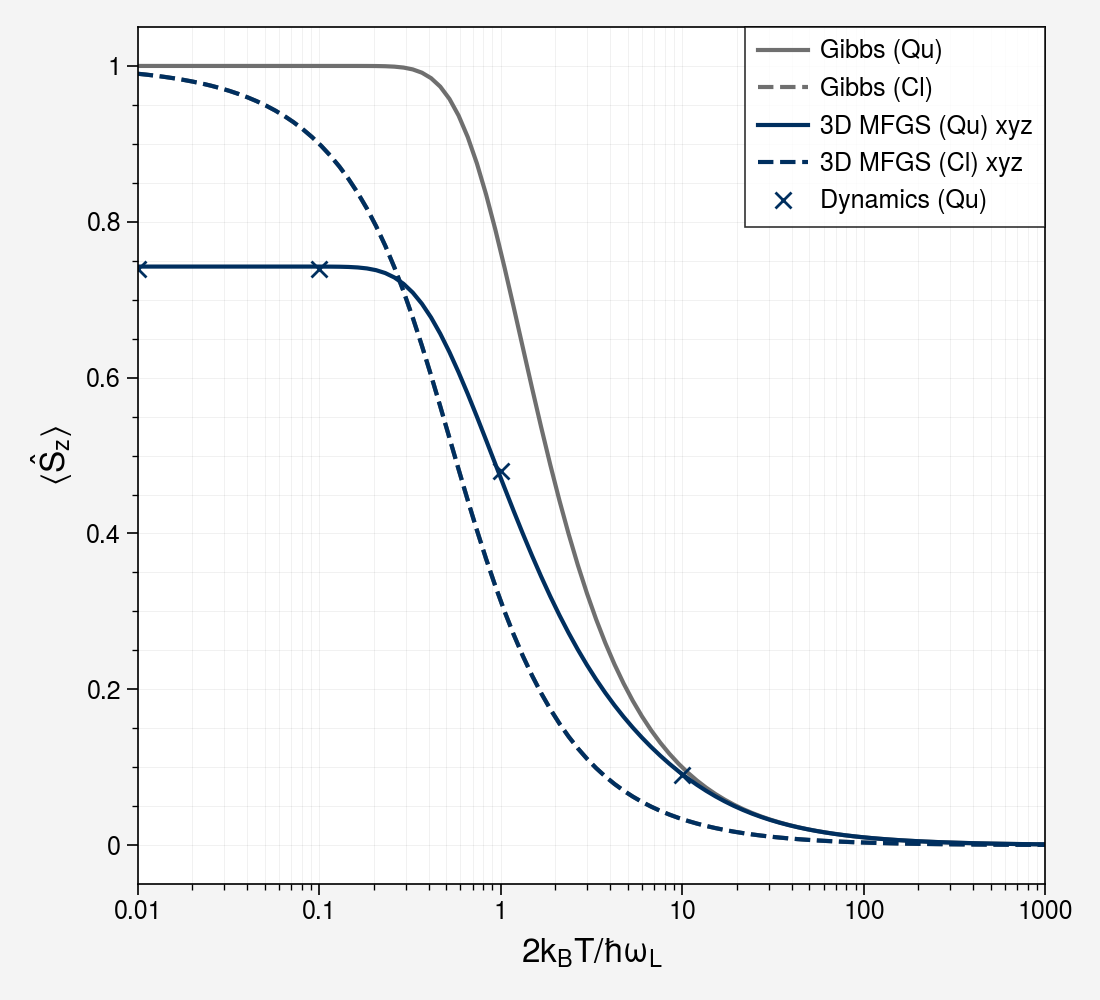

In [34]:
fig, ax = plt.subplots(figsize=(5.5, 5))  #size in inches

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax.set_xlim(0.01, 1000)

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax.semilogx(dataG[:,0], -dataG[:,1], '#6f6f6f', label="Gibbs (Qu)") # Gibbs State
ax.semilogx(dataG[:,0], ((1/np.tanh(1/dataG[:,0]) - (dataG[:,0]))), '#6f6f6f', linestyle="--", label="Gibbs (Cl)") # Gibbs State
ax.semilogx(data3D_xyz[:,0], -data3D_xyz[:,1], '#002f5f', label="3D MFGS (Qu) xyz") # 3D MFGS XYZ
ax.semilogx(data3D_xyz_cl[:,0], data3D_xyz_cl[:,1], '#002f5f', linestyle='--', label="3D MFGS (Cl) xyz") # 3D MFGS XYZ
ax.plot(0.01, 0.74, '#002f5f', marker='x', linestyle='None', label="Dynamics (Qu)")
ax.plot(0.1, 0.74, '#002f5f', marker='x')
ax.plot(1, 0.48, '#002f5f', marker='x')
ax.plot(10, 0.09, '#002f5f', marker='x')
ax.grid(which='both', lw='0.2')

ax.legend(ncol=1)

fig.tight_layout()

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//poster_plot.pdf", dpi=300)